# Question

Use at least two spatial data sets of your choosing, preferably related to your project:

1. project them to a projected (non spherical) coordinate system using geopandas.

2. Create at least two different maps with geopandas, with no bounding box, and a title, and at least two layers, showing data attributes as choroplethic maps (polygons or points) with an appropriate colormap.

Incorporate into your processing and map creation

* a spatial join

* a buffer, and

* distance calculation

Submit your completed notebook via bcourses.

# Answer
analysing bus stops data of AC transit and housing rentals of Craigslist in Albany California

* a spatial join: join Albany geopandas and entire bus stops of AC transit

* a buffer: buffer of bus stops of AC transit in Albany

* distance calculation: distance between each housing on Craigslist and nearest bus stops

## Preparation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import requests
import json
from google.transit import gtfs_realtime_pb2

import pprint
pp = pprint.PrettyPrinter()

import geopandas as gpd
from shapely.geometry import Point
import fiona

In [2]:
veh_gtfs = gtfs_realtime_pb2.FeedMessage()
response = requests.get("https://api.actransit.org/transit/gtfsrt/vehicles/?token=6007969EA35FBAAEF9C3FAF1D65976ED")
veh_gtfs.ParseFromString(response.content)

22959

In [3]:
# empty dict to store gtfs data. will be translated DataFrame later
veh_dict = {"id":[], "trip_id":[], "start_time":[], "start_date":[], "route_id":[],
             "latitude":[], "longitude":[], "bearing":[], "speed":[],
             "timestamp":[], "veh_id":[], "label":[], "license_plate":[]}

for en in veh_gtfs.entity:
    veh_dict["id"].append(en.id)
    veh_dict["trip_id"].append(en.vehicle.trip.trip_id)
    veh_dict["start_time"].append(en.vehicle.trip.start_time)
    veh_dict["start_date"].append(en.vehicle.trip.start_date)
    veh_dict['route_id'].append(en.vehicle.trip.route_id)
    veh_dict["latitude"].append(en.vehicle.position.latitude)
    veh_dict["longitude"].append(en.vehicle.position.longitude)
    veh_dict["bearing"].append(en.vehicle.position.bearing)
    veh_dict["speed"].append(en.vehicle.position.speed)
    veh_dict["timestamp"].append(en.vehicle.timestamp)
    veh_dict["veh_id"].append(en.vehicle.vehicle.id)
    veh_dict["label"].append(en.vehicle.vehicle.label)
    veh_dict["license_plate"].append(en.vehicle.vehicle.license_plate)

veh_df = pd.DataFrame(veh_dict).sort_values(by='speed', ascending=False)
veh_df.head()

,id,trip_id,start_time,start_date,route_id,latitude,longitude,bearing,speed,timestamp,veh_id,label,license_plate
0,d4c0d0bf-6eb1-44d0-9eab-db4c10f17bbb,6172182,00:00:00,19000101,14,37.798489,-122.257401,49.0,255.0,1538093526,5,,
96,ec97f037-dfc7-47b2-8c7f-4f6f6094b40c,6167265,22:08:00,20181103,33,37.799923,-122.249939,225.0,74.0,1541308802,1584,,
43,f36433a3-de9c-470b-b20b-de53dea2ee9c,6278889,22:10:00,20181103,97,37.672791,-122.122604,150.0,71.0,1541308698,1406,,
49,65ab3710-a810-4faf-bd3d-95896333b965,6278425,20:50:00,20181103,99,37.669792,-122.086472,135.0,67.0,1541308787,1417,,
42,551955de-114a-4dc8-8f6c-b406075d850d,6278754,22:10:00,20181103,34,37.667702,-122.095459,150.0,62.0,1541308679,1405,,


In [4]:
crs = {'init' :'epsg:4326'}
geometry = [Point(xy) for xy in zip(veh_df.longitude, veh_df.latitude)]
veh_geodf = gpd.GeoDataFrame(veh_df, crs=crs, geometry=geometry)
veh_geodf.head()

,id,trip_id,start_time,start_date,route_id,latitude,longitude,bearing,speed,timestamp,veh_id,label,license_plate,geometry
0,d4c0d0bf-6eb1-44d0-9eab-db4c10f17bbb,6172182,00:00:00,19000101,14,37.798489,-122.257401,49.0,255.0,1538093526,5,,,POINT (-122.2574005126953 37.79848861694336)
96,ec97f037-dfc7-47b2-8c7f-4f6f6094b40c,6167265,22:08:00,20181103,33,37.799923,-122.249939,225.0,74.0,1541308802,1584,,,POINT (-122.2499389648438 37.79992294311523)
43,f36433a3-de9c-470b-b20b-de53dea2ee9c,6278889,22:10:00,20181103,97,37.672791,-122.122604,150.0,71.0,1541308698,1406,,,POINT (-122.1226043701172 37.67279052734375)
49,65ab3710-a810-4faf-bd3d-95896333b965,6278425,20:50:00,20181103,99,37.669792,-122.086472,135.0,67.0,1541308787,1417,,,POINT (-122.0864715576172 37.66979217529297)
42,551955de-114a-4dc8-8f6c-b406075d850d,6278754,22:10:00,20181103,34,37.667702,-122.095459,150.0,62.0,1541308679,1405,,,POINT (-122.095458984375 37.66770172119141)


In [5]:
stops_json = json.loads(requests.get("https://api.actransit.org/transit/stops/?token=6007969EA35FBAAEF9C3FAF1D65976ED").text)

In [6]:
stops_df = pd.io.json.json_normalize(stops_json)
crs = {'init' :'epsg:4326'}
geometry = [Point(xy) for xy in zip(stops_df.Longitude, stops_df.Latitude)]
stops_geodf = gpd.GeoDataFrame(stops_df, crs=crs, geometry=geometry)
stops_geodf.head()

,Latitude,Longitude,Name,StopId,geometry
0,37.773268,-122.288228,3rd St:Santa Clara Av,58123,POINT (-122.2882275 37.7732681)
1,37.768814,-122.272992,8th St:Portola Av,52246,POINT (-122.2729918 37.7688136)
2,37.768993,-122.272798,8th St:Portola Av,57793,POINT (-122.2727976 37.7689929)
3,37.790573,-122.293954,Alameda Ferry Terminal,58355,POINT (-122.2939535 37.7905726)
4,37.780272,-122.264015,Atlantic Av:#1105,56707,POINT (-122.2640149 37.7802724)


In [7]:
blocks = gpd.read_file('data/bayarea_block2000.shp')
blocks_alb = blocks[(blocks["FIRST_TRAC"] == "420100")|(blocks["FIRST_TRAC"] == "420200")| \
                    (blocks["FIRST_TRAC"] == "420300")|(blocks["FIRST_TRAC"] == "420400")| \
                    (blocks["FIRST_TRAC"] == "420500")|(blocks["FIRST_TRAC"] == "420600")]
blocks_alb.head()

,STFID,COUNT,FIRST_FIPS,FIRST_TRAC,FIRST_BLOC,geometry
4294,060014201001000,1,06001,420100,1000,"POLYGON ((-122.29038 37.896725, -122.29128 37...."
4295,060014201001001,1,06001,420100,1001,"POLYGON ((-122.29128 37.896725, -122.29208 37...."
4296,060014201001002,1,06001,420100,1002,"POLYGON ((-122.29318 37.897825, -122.29318 37...."
4297,060014201001003,1,06001,420100,1003,"POLYGON ((-122.29448 37.897825, -122.29448 37...."
4298,060014201001004,1,06001,420100,1004,"POLYGON ((-122.29448 37.897825, -122.29548 37...."


## sapatial join

In [8]:
blocks_alb.crs = stops_geodf.crs
stops_geodf_alb = gpd.sjoin(stops_geodf, blocks_alb, how="inner", op='intersects')
stops_geodf_alb.head()

,Latitude,Longitude,Name,StopId,geometry,index_right,STFID,COUNT,FIRST_FIPS,FIRST_TRAC,FIRST_BLOC
226,37.896314,-122.308150,Bayside Common Condominiums,55064,POINT (-122.30815 37.8963137),4362,060014203001000,1,06001,420300,1000
237,37.894086,-122.307189,Pierce St:Gateview Apts,56411,POINT (-122.3071888 37.8940856),4362,060014203001000,1,06001,420300,1000
240,37.897137,-122.301025,San Pablo Av:Brighton Av,52117,POINT (-122.301025 37.8971372),4362,060014203001000,1,06001,420300,1000
241,37.896510,-122.301090,San Pablo Av:Brighton Av,56422,POINT (-122.30109 37.8965096),4362,060014203001000,1,06001,420300,1000
227,37.887757,-122.300790,Buchanan St:Jackson St,53578,POINT (-122.3007899 37.8877566),4376,060014203002009,1,06001,420300,2009


In [9]:
blocks_alb.crs = veh_geodf.crs
veh_geodf_alb = gpd.sjoin(veh_geodf, blocks_alb, how="inner", op='intersects')
veh_geodf_alb.head()

,id,trip_id,start_time,start_date,route_id,latitude,longitude,bearing,speed,timestamp,veh_id,label,license_plate,geometry,index_right,STFID,COUNT,FIRST_FIPS,FIRST_TRAC,FIRST_BLOC
31,73320fe2-6eca-4bfd-bcac-ede9bfb4eff6,6167514,21:22:00,20181103,18,37.884293,-122.298508,60.0,0.0,1541308746,1343,,,POINT (-122.2985076904297 37.88429260253906),4403,060014204001007,1,06001,420400,1007


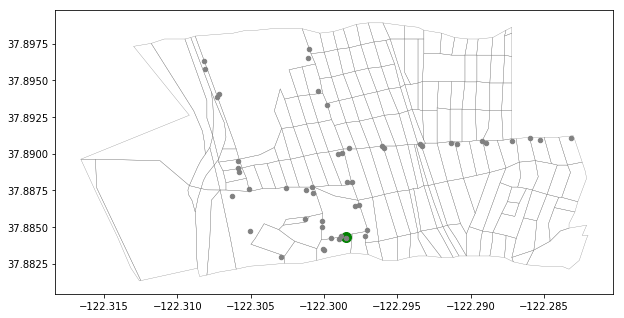

In [10]:
base = blocks_alb.plot(color='none', edgecolor='gray', linewidth=.3, figsize=(10,10))
veh_geodf_alb.plot(ax=base, color="green", markersize=100)
stops_geodf_alb.plot(ax=base, color="gray", markersize=20)
plt.savefig("stops_position_alb")

In [11]:
mtc_crs = '+proj=utm +zone=10 +ellps=GRS80 +datum=NAD83 +units=m +no_defs '
stops_alb_proj = stops_geodf_alb.to_crs(mtc_crs)
veh_alb_proj = veh_geodf_alb.to_crs(mtc_crs)
blocks_alb_proj = blocks_alb.to_crs(mtc_crs)
blocks_alb_proj = blocks_alb_proj.dissolve(by="FIRST_BLOC")

In [12]:
blocks_stops = stops_alb_proj.groupby('FIRST_BLOC')['STFID'].count().to_frame(name='total_stops').reset_index()
blocks_stops.head()

,FIRST_BLOC,total_stops
0,1000,5
1,1001,6
2,1002,9
3,1003,1
4,1004,1


In [13]:
blocks_alb_proj_stops = pd.merge(blocks_alb_proj, blocks_stops, on='FIRST_BLOC', how="left")
blocks_alb_proj_stops = blocks_alb_proj_stops.fillna(0)

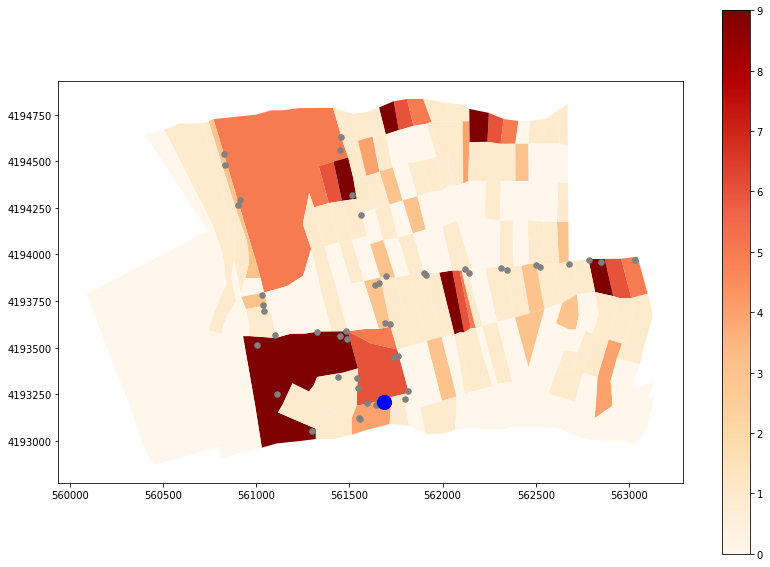

In [14]:
base2 = blocks_alb_proj_stops.plot(column='total_stops', figsize=(14,10), cmap='OrRd', legend=True)
stops_alb_proj.plot(ax=base2, color="gray", markersize=30)
veh_alb_proj.plot(ax=base2, color="blue", markersize=200)
plt.savefig("stops_position_alb_colored")

## buffer

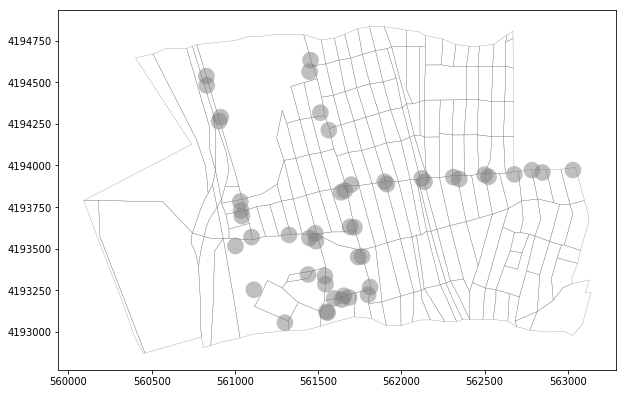

In [15]:
stops_buffer = stops_alb_proj['geometry'].buffer(50)
base = blocks_alb_proj.plot(color='none', edgecolor='gray', linewidth=.3, figsize=(10,10))
stops_buffer.plot(ax=base, color="gray", markersize=4, alpha = 0.5)

In [16]:
stops_buffer_df = gpd.GeoDataFrame({'geometry': stops_buffer, 'stops_buffer_id':list(stops_alb_proj["StopId"])})
stops_buffer_df.head()

,geometry,stops_buffer_id
226,"POLYGON ((560878.3722185174 4194536.49675961, ...",55064
237,"POLYGON ((560964.7193675322 4194289.911643714,...",56411
240,"POLYGON ((561504.1346666741 4194632.536337191,...",52117
241,"POLYGON ((561498.9415418031 4194562.859928152,...",56422
227,"POLYGON ((561532.6063417824 4193591.894043086,...",53578


## distance calculation

In [17]:
house_df = pd.read_csv('data/sfbay_geocoded.csv', dtype={'fips_block': str})
house_df = house_df.iloc[:,2:]
house_df.head()

,pid,date,region,neighborhood,rent,bedrooms,sqft,rent_sqft,rent_sqft_cat,longitude,latitude,county,fips_block,state
0,4465937146,2014-05-11,sfbay,twin peaks / diamond hts,4500.0,2.0,1200.0,3.750000,5,-122.438300,37.745000,San Francisco,060750216002015,CA
1,4446270486,2014-05-11,sfbay,sunnyvale,2650.0,2.0,1040.0,2.548077,5,-122.008131,37.353699,Santa Clara,060855085053008,CA
2,4465913377,2014-05-11,sfbay,glen park,3100.0,2.0,1000.0,3.100000,5,-122.439743,37.731584,San Francisco,060750311005011,CA
3,4465933497,2014-05-11,sfbay,redwood city,1850.0,1.0,792.0,2.335859,5,-122.234294,37.491715,San Mateo,060816101001026,CA
4,4465926659,2014-05-11,sfbay,walnut creek,1325.0,1.0,642.0,2.063863,5,-122.087751,37.923448,Contra Costa,060133400021004,CA


In [18]:
crs = {'init' :'epsg:4326'}
geometry = [Point(xy) for xy in zip(house_df.longitude, house_df.latitude)]
house_geodf = gpd.GeoDataFrame(house_df, crs=crs, geometry=geometry)
house_geodf.head()

,pid,date,region,neighborhood,rent,bedrooms,sqft,rent_sqft,rent_sqft_cat,longitude,latitude,county,fips_block,state,geometry
0,4465937146,2014-05-11,sfbay,twin peaks / diamond hts,4500.0,2.0,1200.0,3.750000,5,-122.438300,37.745000,San Francisco,060750216002015,CA,POINT (-122.4383 37.745)
1,4446270486,2014-05-11,sfbay,sunnyvale,2650.0,2.0,1040.0,2.548077,5,-122.008131,37.353699,Santa Clara,060855085053008,CA,POINT (-122.008131 37.353699)
2,4465913377,2014-05-11,sfbay,glen park,3100.0,2.0,1000.0,3.100000,5,-122.439743,37.731584,San Francisco,060750311005011,CA,POINT (-122.439743 37.73158400000001)
3,4465933497,2014-05-11,sfbay,redwood city,1850.0,1.0,792.0,2.335859,5,-122.234294,37.491715,San Mateo,060816101001026,CA,POINT (-122.234294 37.491715)
4,4465926659,2014-05-11,sfbay,walnut creek,1325.0,1.0,642.0,2.063863,5,-122.087751,37.923448,Contra Costa,060133400021004,CA,POINT (-122.087751 37.923448)


In [19]:
house_alb_geodf = gpd.sjoin(house_geodf, blocks_alb, how="inner", op='intersects')
house_alb_geodf.head()

,pid,date,region,neighborhood,rent,bedrooms,sqft,rent_sqft,rent_sqft_cat,longitude,...,county,fips_block,state,geometry,index_right,STFID,COUNT,FIRST_FIPS,FIRST_TRAC,FIRST_BLOC
11,4465887730,2014-05-11,sfbay,albany / el cerrito,2200.0,2.0,1040.0,2.115385,5,-122.306585,...,Alameda,060014203002000,CA,POINT (-122.306585 37.893787),4362,060014203001000,1,06001,420300,1000
1010,4465887730,2014-05-11,sfbay,albany / el cerrito,2200.0,2.0,1040.0,2.115385,5,-122.306585,...,Alameda,060014203002000,CA,POINT (-122.306585 37.893787),4362,060014203001000,1,06001,420300,1000
2065,4465026286,2014-05-11,sfbay,albany / el cerrito,2400.0,2.0,1170.0,2.051282,5,-122.307020,...,Alameda,060014203003000,CA,POINT (-122.30702 37.89322),4362,060014203001000,1,06001,420300,1000
2322,4469238528,2014-05-13,sfbay,albany / el cerrito,2400.0,2.0,1170.0,2.051282,5,-122.307020,...,Alameda,060014203003000,CA,POINT (-122.30702 37.89322),4362,060014203001000,1,06001,420300,1000
4934,4470472867,2014-05-14,sfbay,albany / el cerrito,1100.0,NaN,400.0,2.750000,5,-122.303302,...,Alameda,060014203002000,CA,POINT (-122.303302 37.89526),4362,060014203001000,1,06001,420300,1000


In [20]:
house_alb_proj = house_alb_geodf.to_crs(mtc_crs)
house_alb_proj.head()

,pid,date,region,neighborhood,rent,bedrooms,sqft,rent_sqft,rent_sqft_cat,longitude,...,county,fips_block,state,geometry,index_right,STFID,COUNT,FIRST_FIPS,FIRST_TRAC,FIRST_BLOC
11,4465887730,2014-05-11,sfbay,albany / el cerrito,2200.0,2.0,1040.0,2.115385,5,-122.306585,...,Alameda,060014203002000,CA,POINT (560968.054790008 4194257.175826428),4362,060014203001000,1,06001,420300,1000
1010,4465887730,2014-05-11,sfbay,albany / el cerrito,2200.0,2.0,1040.0,2.115385,5,-122.306585,...,Alameda,060014203002000,CA,POINT (560968.054790008 4194257.175826428),4362,060014203001000,1,06001,420300,1000
2065,4465026286,2014-05-11,sfbay,albany / el cerrito,2400.0,2.0,1170.0,2.051282,5,-122.307020,...,Alameda,060014203003000,CA,POINT (560930.274592806 4194193.98176886),4362,060014203001000,1,06001,420300,1000
2322,4469238528,2014-05-13,sfbay,albany / el cerrito,2400.0,2.0,1170.0,2.051282,5,-122.307020,...,Alameda,060014203003000,CA,POINT (560930.274592806 4194193.98176886),4362,060014203001000,1,06001,420300,1000
4934,4470472867,2014-05-14,sfbay,albany / el cerrito,1100.0,NaN,400.0,2.750000,5,-122.303302,...,Alameda,060014203002000,CA,POINT (561255.4932418829 4194422.759165393),4362,060014203001000,1,06001,420300,1000


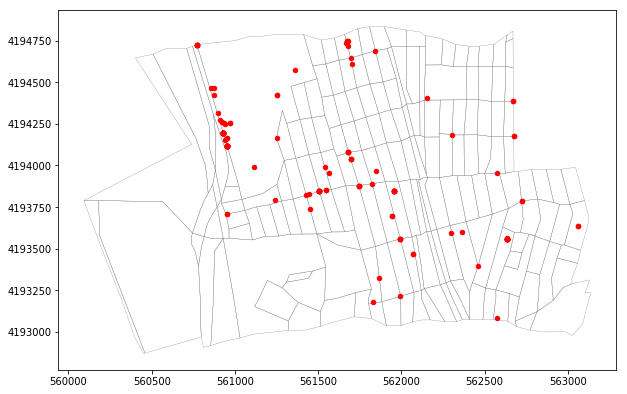

In [21]:
base = blocks_alb_proj.plot(color='none', edgecolor='gray', linewidth=.3, figsize=(10,10))
house_alb_proj.plot(ax=base, color="red", markersize=20)

## distance calculation

In [22]:
house_alb_proj['min_dist_to_stops'] = house_alb_proj.geometry.apply(lambda g: stops_alb_proj.distance(g).min())

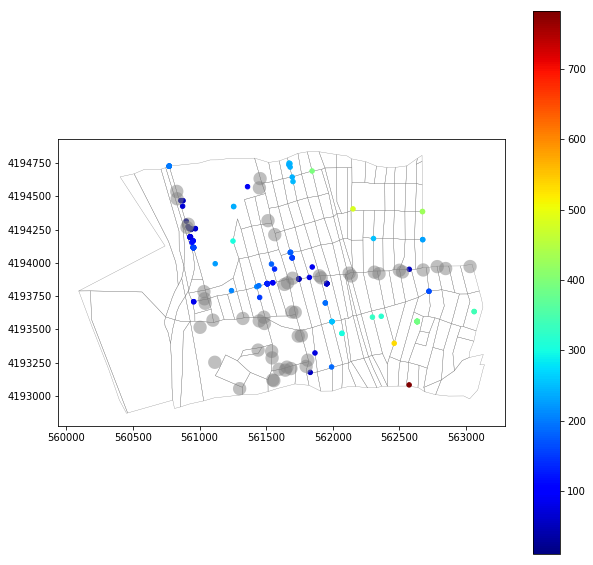

In [23]:
base = blocks_alb_proj.plot(color='none', edgecolor='gray', linewidth=.3, figsize=(10,10))
house_alb_proj.plot(ax=base, column='min_dist_to_stops', cmap='jet', markersize=20, legend=True)
stops_buffer_df.plot(ax=base, color='gray', markersize = 5, alpha=.5)

## Extra analysis

In [24]:
import seaborn as sns

/Users/takuma/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/takuma/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/takuma/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


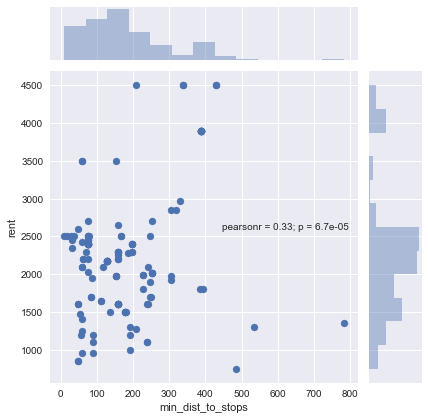

In [25]:
sns.set()
sns.jointplot(data=house_alb_proj, x='min_dist_to_stops', y="rent")

There is weak positive correlation between housing rental price and distance of nearest bus stop. However, the analysis did not consider bus stops in surrounding cities (Berkeley, El Cerrito). If those bus stops is taken into accouts, there may be week negative correlation because living near to public transportation stops is convinient. Moreover, in many Asia countries, I guess the correlation is stronger since people in those countries use bus and train more often than cars.